In [1]:
import torch

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.4 MB/s eta 0:00:00


In [3]:
import os
import shutil
from pathlib import Path
import yaml
from IPython.display import Image, display
import matplotlib.pyplot as plt

In [4]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
!unzip /content/vehicle_detection.v1-dataset-2025-11-2-9-06.yolov8.zip


Archive:  /content/vehicle_detection.v1-dataset-2025-11-2-9-06.yolov8.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/00_mp4-0010_jpg.rf.58401c6f2d950ac1430d0af870fb16ec.jpg  
 extracting: test/images/00_mp4-0011_jpg.rf.8411e434adbf2d89295c7722c2436b15.jpg  
 extracting: test/images/00_mp4-0015_jpg.rf.0fc5d8a2c30084af55114f739bf6b130.jpg  
 extracting: test/images/00_mp4-0017_jpg.rf.d7d1b2f216d80cc1f47a673846bd9b90.jpg  
 extracting: test/images/1682252179263_jpg.rf.ddd802b44fd66d296ba0e6b38c741014.jpg  
 extracting: test/images/1682252179715_jpg.rf.487aece210a1cf6f2f27fcd236cf5c53.jpg  
 extracting: test/images/20210507_14_19_33_000_U1gCHhy3W1b1d09usVBXgpXOjtD3_F_4160_3120_jpg.rf.89249f7e5ee1e5cbcbb2742ba89cf2a2.jpg  
 extracting: test/images/20210511_16_16_22_000_vk6v8isL5LawZlhfFajO0BsLTcF3_T_2128_4608_jpg.rf.59c2cfc5ca4a5b207d2be5cebd219ff1.jpg

In [6]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/data.yaml epochs=20 imgsz=640

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretr

In [7]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/data.yaml

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1580.2±505.5 MB/s, size: 59.4 KB)
val: Scanning /content/valid/labels.cache... 299 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 299/299 5.2Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 4.7it/s 4.0s
                   all        299        766      0.649      0.737      0.723      0.546
             auto_back         23         26      0.587      0.769      0.662      0.533
            auto_front         24         30      0.755      0.733      0.814      0.608
              bus_back         17         18      0.563      0.722      0.679      0.588
             bus_front         25         28      0.771       0.75      0.835      0.662
              car_back        102        179      0.789   

In [8]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/test/images

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs

image 1/150 /content/test/images/00_mp4-0010_jpg.rf.58401c6f2d950ac1430d0af870fb16ec.jpg: 640x640 2 car_fronts, 1 number_plate, 9.0ms
image 2/150 /content/test/images/00_mp4-0011_jpg.rf.8411e434adbf2d89295c7722c2436b15.jpg: 640x640 1 car_back, 2 car_fronts, 2 number_plates, 1 two_wheeler_back, 7.3ms
image 3/150 /content/test/images/00_mp4-0015_jpg.rf.0fc5d8a2c30084af55114f739bf6b130.jpg: 640x640 1 car_back, 1 car_front, 1 number_plate, 10.3ms
image 4/150 /content/test/images/00_mp4-0017_jpg.rf.d7d1b2f216d80cc1f47a673846bd9b90.jpg: 640x640 1 car_back, 1 number_plate, 7.3ms
image 5/150 /content/test/images/1682252179263_jpg.rf.ddd802b44fd66d296ba0e6b38c741014.jpg: 640x640 1 two_wheeler_front, 7.3ms
image 6/150 /content/test/images/1682252179715_jpg.rf.487aece210a1cf6f2f27fcd236cf5c53.jpg: 640x640 1 two_wheeler_front, 7.3ms
ima

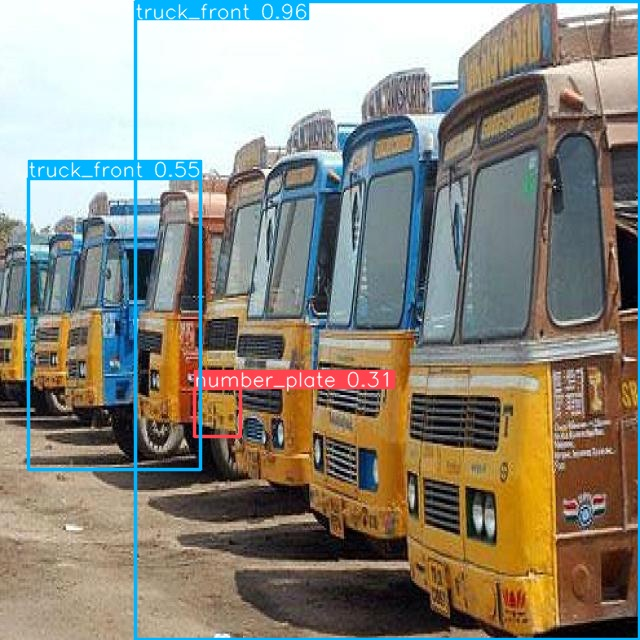

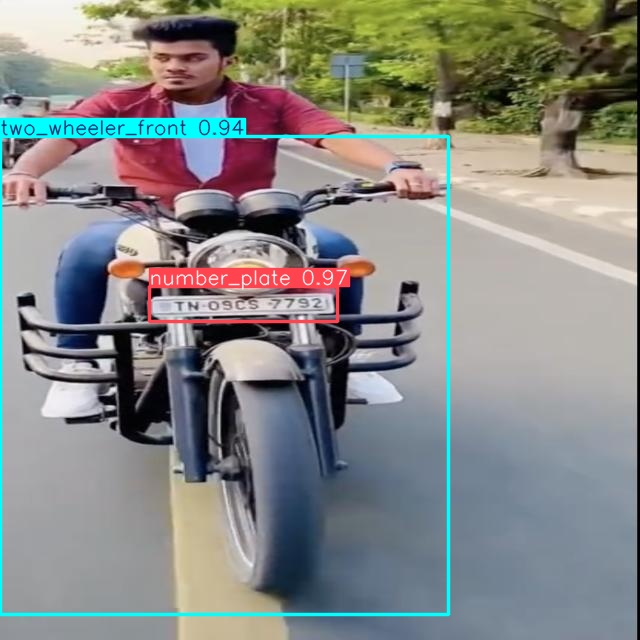

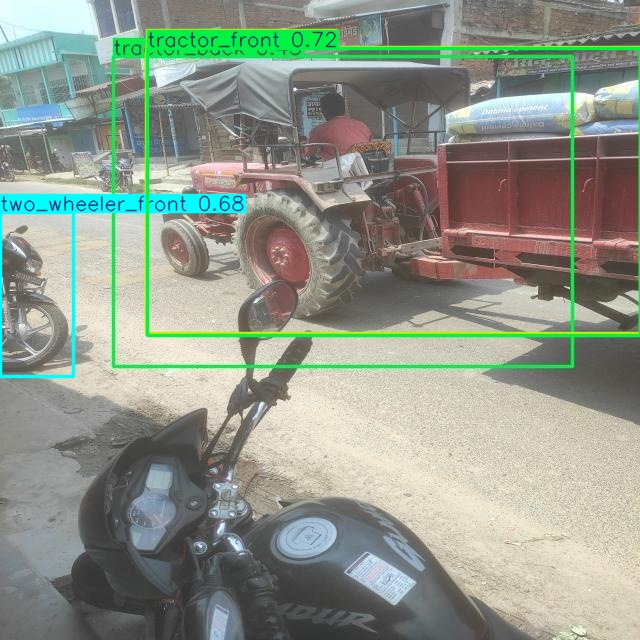

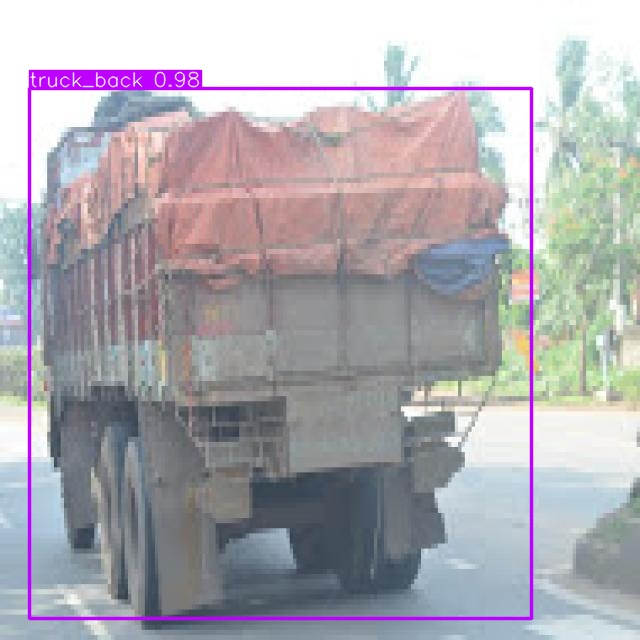

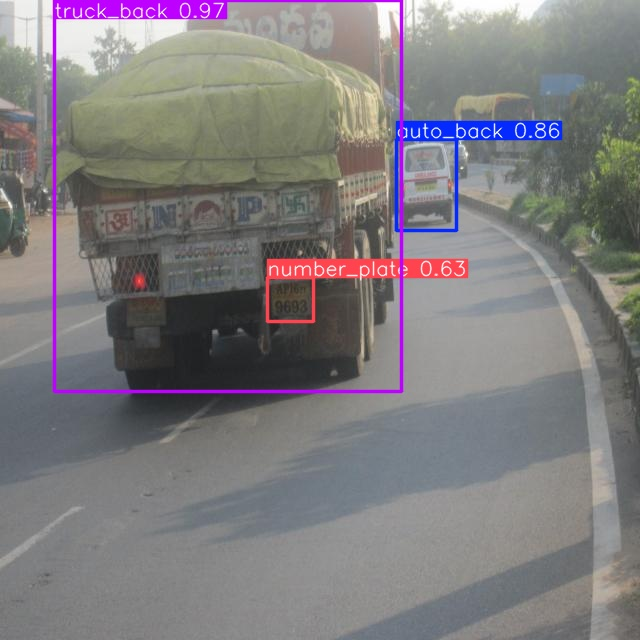

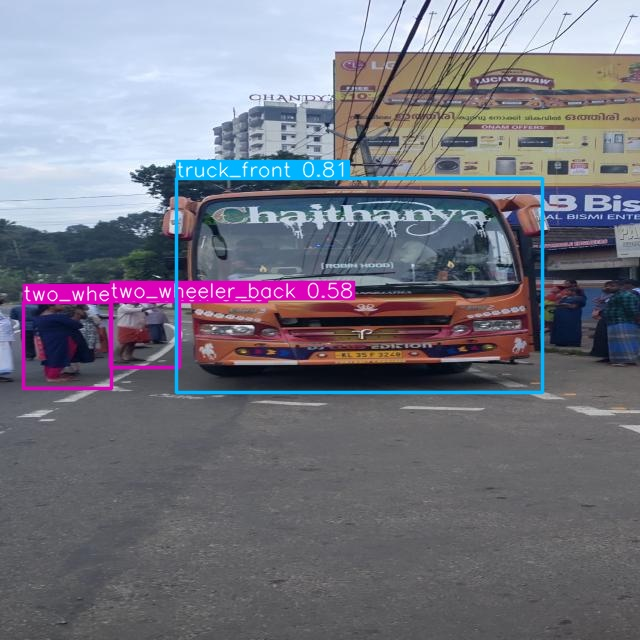

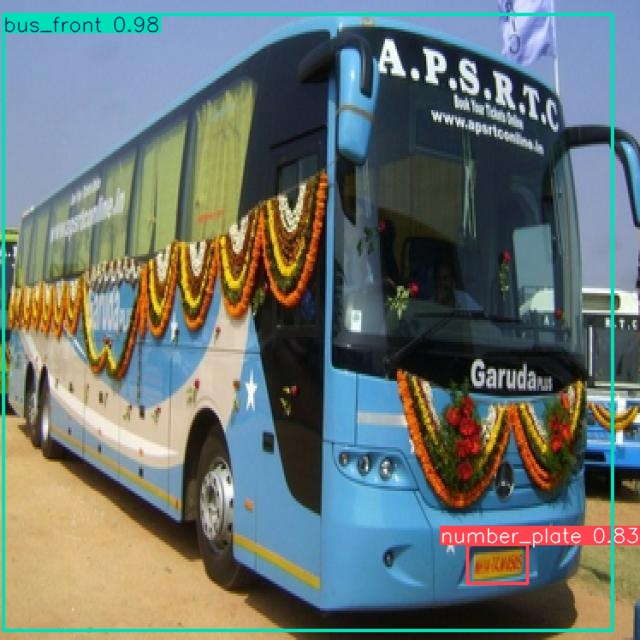

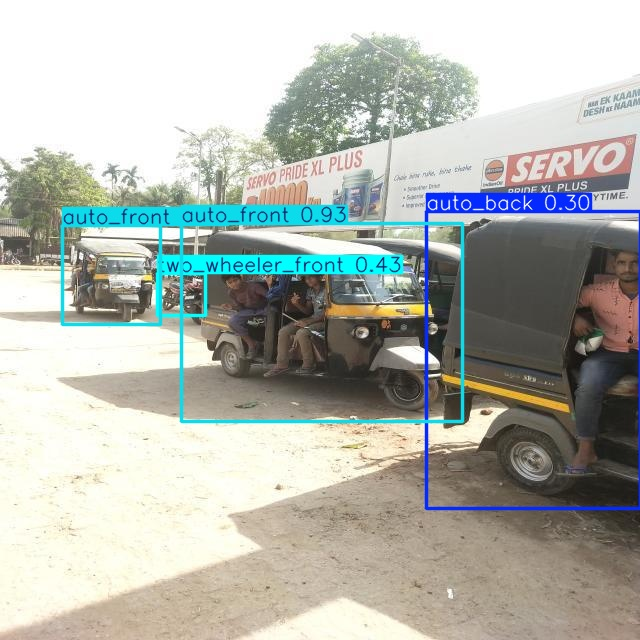

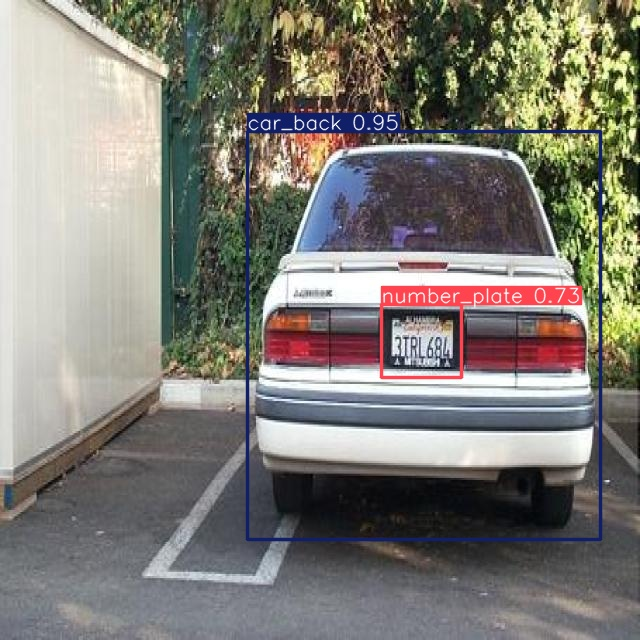

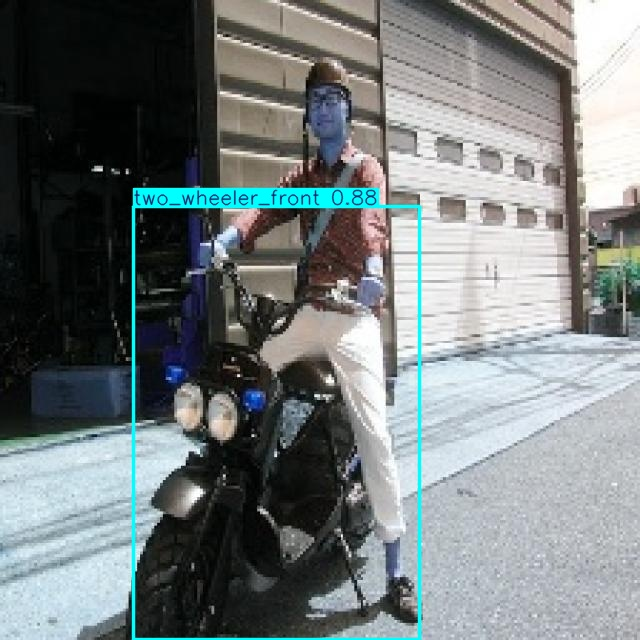

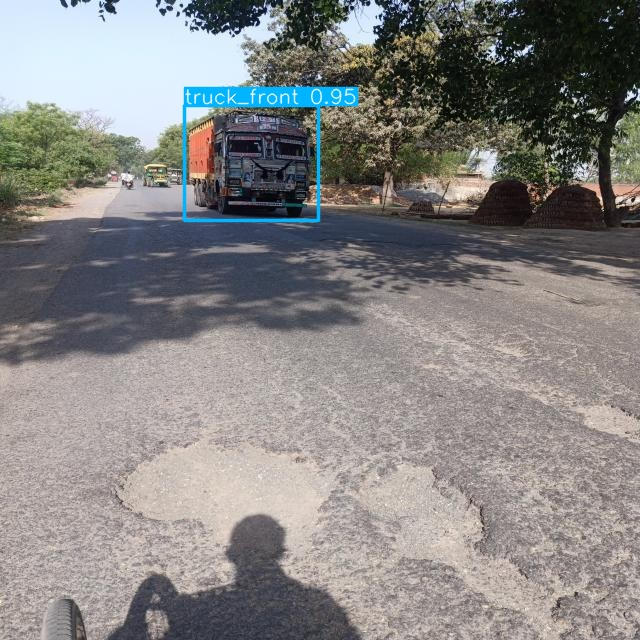

In [10]:
import glob
from IPython.display import Image, display

count = 0

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, height=600))
  count += 1
  if count > 10:
    break
  print('\n')